# **PROYECTO BOOTCAMP - CRISTIAN OSSA ALZATE**

## TEMA: CRECIMIENTO DEL PARQUE AUTOMOTOR RUNT2.0

El proyecto titulado "Crecimiento del Parque Automotor RUNT2.0" tiene como objetivo analizar y comprender la evolución del parque automotor registrado en el sistema RUNT (Registro Único Nacional de Tránsito) en su versión 2.0. Este análisis busca identificar patrones y tendencias en el crecimiento del parque vehicular en Colombia, a partir de datos históricos y actuales, utilizando herramientas de análisis de datos avanzadas.

<img src="https://th.bing.com/th/id/R.bd550d093c0292f6a4eee9c052c9e072?rik=usizDKekQaTC5g&riu=http%3a%2f%2fwww.runt.com.co%2frunt%2fapppub%2fmedios%2fimg%2fLogo_RUNT_Rombos_232X163.png&ehk=neiMyKr3IisyaSKMm0mykS2B04yXL8DgFerVsHQRHz8%3d&risl=&pid=ImgRaw&r=0" alt="Logo RUNT">

El proyecto empleará técnicas de análisis estadístico y visualización de datos en Google Colab, ofreciendo una plataforma interactiva para explorar los resultados y facilitar la toma de decisiones informadas.

La fuente de datos que se utilizara en el presente proyecto proviene de https://www.datos.gov.co/Transporte/CRECIMIENTO-DEL-PARQUE-AUTOMOTOR-RUNT2-0/u3vn-bdcy/about_data

Tambien se puede encontrar en https://raw.githubusercontent.com/cristianossa/CRECIMIENTO-PARQUE-AUTOMOTOR-RUNT/refs/heads/main/CRECIMIENTO_DEL_PARQUE_AUTOMOTOR_RUNT2.0_20241110.csv

A continuación, importaremos la base de datos previamente limpiada, la cual fue procesada y depurada utilizando OpenRefine y Excel. proviene de https://raw.githubusercontent.com/cristianossa/CRECIMIENTO-PARQUE-AUTOMOTOR-RUNT/refs/heads/main/CRECIMIENTO-DEL-PARQUE-AUTOMOTOR-RUNT2-0-LIMPIEZA.csv


In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# URL del archivo CSV
url = "https://raw.githubusercontent.com/cristianossa/CRECIMIENTO-PARQUE-AUTOMOTOR-RUNT/refs/heads/main/CRECIMIENTO-DEL-PARQUE-AUTOMOTOR-RUNT2-0-LIMPIEZA.csv"

# ImporTE el archivo CSV desde la URL
df = pd.read_csv(url)
# visualizar las primeras filas del DataFrame
df.head()

,NOMBRE_DEPARTAMENTO,NOMBRE_MUNICIPIO,NOMBRE_SERVICIO,ESTADO_DEL_VEHICULO,CATEGORIA,SUBCATEGORIA,FECHA DE REGISTRO,CANTIDAD,MES DE PUBLICACION,AÑO DE PUBLICACION
0,ANTIOQUIA,ANDES,PARTICULAR,ACTIVO,CAMIONETA,CAMPERO,1900,1,OCTUBRE,2024
1,ATLANTICO,BARANOA,PARTICULAR,ACTIVO,AUTOMOVILES,AUTOMOVIL,1900,1,OCTUBRE,2024
2,ATLANTICO,BARANOA,PÚBLICO,ACTIVO,CAMION,CAMION,1900,1,OCTUBRE,2024
3,BOGOTA,BOGOTA,OFICIAL,ACTIVO,AUTOMOVILES,AUTOMOVIL,1900,1,OCTUBRE,2024
4,BOGOTA,BOGOTA,PARTICULAR,ACTIVO,AUTOMOVILES,AUTOMOVIL,1900,1,OCTUBRE,2024


En esta etapa del análisis de datos, realicé algunas transformaciones adicionales en las columnas de la base de datos para mejorar la claridad y precisión en la interpretación de la información:

## Cambio de Nombres de Columnas:

Renombré la columna '**FECHA DE REGISTRO**' a '**AÑO DE REGISTRO**' para enfatizar que esta columna solo contiene información del año.


## Eliminación de Columnas Irrelevantes:

Eliminé las columnas '**MES DE PUBLICACION**' y '**AÑO DE PUBLICACION**' ya que la información que aportan no es relevante para el objetivo del análisis, todas las filas contienen la misma información: OCTUBRE y 2024 respectivamente.

In [ ]:
# Cambie nombres de columnas
df.rename(columns={
    'FECHA DE REGISTRO': 'AÑO DE REGISTRO',
}, inplace=True)

# Elimine columnas que no necesito
df.drop(columns=['MES DE PUBLICACION', 'AÑO DE PUBLICACION'], inplace=True)

# Visualizar
df.head()

,NOMBRE_DEPARTAMENTO,NOMBRE_MUNICIPIO,NOMBRE_SERVICIO,ESTADO_DEL_VEHICULO,CATEGORIA,SUBCATEGORIA,AÑO DE REGISTRO,CANTIDAD
0,ANTIOQUIA,ANDES,PARTICULAR,ACTIVO,CAMIONETA,CAMPERO,1900,1
1,ATLANTICO,BARANOA,PARTICULAR,ACTIVO,AUTOMOVILES,AUTOMOVIL,1900,1
2,ATLANTICO,BARANOA,PÚBLICO,ACTIVO,CAMION,CAMION,1900,1
3,BOGOTA,BOGOTA,OFICIAL,ACTIVO,AUTOMOVILES,AUTOMOVIL,1900,1
4,BOGOTA,BOGOTA,PARTICULAR,ACTIVO,AUTOMOVILES,AUTOMOVIL,1900,1


## Distribución geográfica de los vehículos:

He importado una base de datos con coordenadas geográficas porque estoy trabajando en un análisis que requiere visualizar los datos en un mapa para hacer análisis geográficos. Dado que nuestra base de datos original no cuenta con coordenadas, he optado por cruzarla con esta nueva base que contiene la ubicación geográfica precisa de cada municipio.

In [ ]:
# archivo del DANE
url_lat = "https://raw.githubusercontent.com/cristianossa/CRECIMIENTO-PARQUE-AUTOMOTOR-RUNT/refs/heads/main/DIVIPOLA_CentrosPoblados.csv"

# Importe el archivo  desde la URL
df_lat = pd.read_csv(url_lat, delimiter=';')

# Filtre las filas donde 'Codigo_Mun' termina en "000" para dejar solo la capital principal
df_lat = df_lat[df_lat['Codigo_Mun'].astype(str).str.endswith("000")]

# Mostre las primeras filas del DataFrame
df_lat.head()

,Codigo_Col,Departamento,Codigo_Dep,Municipio,Codigo_Mun,Nombre,Tipo\n,Longitud,Latitud
0,5,ANTIOQUIA,5001,MEDELLIN,5001000,"MEDELLIN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",CM,"-75,578661","6,250063"
28,5,ANTIOQUIA,5002,ABEJORRAL,5002000,ABEJORRAL,CM,"-75,428739","5,789315"
32,5,ANTIOQUIA,5004,ABRIAQUI,5004000,ABRIAQUI,CM,"-76,064703","6,631806"
34,5,ANTIOQUIA,5021,ALEJANDRIA,5021000,ALEJANDRIA,CM,"-75,141346","6,376061"
35,5,ANTIOQUIA,5030,AMAGA,5030000,AMAGA,CM,"-75,702041","6,038817"


In [ ]:
# Renombre las columnas de 'df' para que coincidan con 'df_lat' y facilitar el cruce
df = df.rename(columns={'NOMBRE_DEPARTAMENTO': 'Departamento', 'NOMBRE_MUNICIPIO': 'Municipio'})

# Realice un merge de ambas bases de datos en las columnas 'Departamento' y 'Municipio'
df = df.merge(df_lat[['Departamento', 'Municipio', 'Longitud', 'Latitud']],
              on=['Departamento', 'Municipio'],
              how='left')

# Converti las columnas 'Longitud' y 'Latitud' a tipo float
df['Longitud'] = df['Longitud'].str.replace(',', '.').astype(float)
df['Latitud'] = df['Latitud'].str.replace(',', '.').astype(float)

# Visualice las primeras filas para verificar la combinación
df.head()

,Departamento,Municipio,NOMBRE_SERVICIO,ESTADO_DEL_VEHICULO,CATEGORIA,SUBCATEGORIA,AÑO DE REGISTRO,CANTIDAD,Longitud,Latitud
0,ANTIOQUIA,ANDES,PARTICULAR,ACTIVO,CAMIONETA,CAMPERO,1900,1,-75.878828,5.657194
1,ATLANTICO,BARANOA,PARTICULAR,ACTIVO,AUTOMOVILES,AUTOMOVIL,1900,1,-74.916073,10.794447
2,ATLANTICO,BARANOA,PÚBLICO,ACTIVO,CAMION,CAMION,1900,1,-74.916073,10.794447
3,BOGOTA,BOGOTA,OFICIAL,ACTIVO,AUTOMOVILES,AUTOMOVIL,1900,1,-74.107359,4.650173
4,BOGOTA,BOGOTA,PARTICULAR,ACTIVO,AUTOMOVILES,AUTOMOVIL,1900,1,-74.107359,4.650173


In [ ]:
# Hago un df totalizado de la cantidad
df_totalizado = df.groupby(['Departamento', 'Municipio']).agg({'CANTIDAD': 'sum', 'Longitud': 'first', 'Latitud': 'first'}).reset_index()

df_totalizado['CANTIDAD'] = df_totalizado['CANTIDAD'] / 100

# Cree un mapa centrado en un lugar de interés
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Cree un MarkerCluster para agrupar las burbujas
marker_cluster = MarkerCluster().add_to(mapa)

# Agregue burbujas
for _, row in df_totalizado.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=row['CANTIDAD'] / 100,  # Ajuste el tamaño
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Departamento: {row['Departamento']}<br>Municipio: {row['Municipio']}<br>Cantidad: {row['CANTIDAD']}"
    ).add_to(marker_cluster)

# Agregue un cuadro de texto indicando la escala de 1 a 100
folium.Marker(
    location=[4.5709, -74.2973],  # Ubicación del  de texto en el mapa
    icon=None,  # Sin icono, solo el texto
    popup='<b>Escala de tamaño:</b><br>De 1 a 100 (Tamaño de burbuja en función de la cantidad)'
).add_to(mapa)

# visualizar el mapa
mapa

## Crecimiento Automotor en los Últimos 30 Años

El siguiente gráfico presenta el crecimiento anual del parque automotor en Colombia durante los últimos 30 años, basado en datos agregados del Registro Único Nacional de Tránsito (RUNT). El análisis se centra en observar la evolución en el número total de vehículos registrados por año, permitiendo identificar tendencias y patrones a lo largo de estas tres décadas.

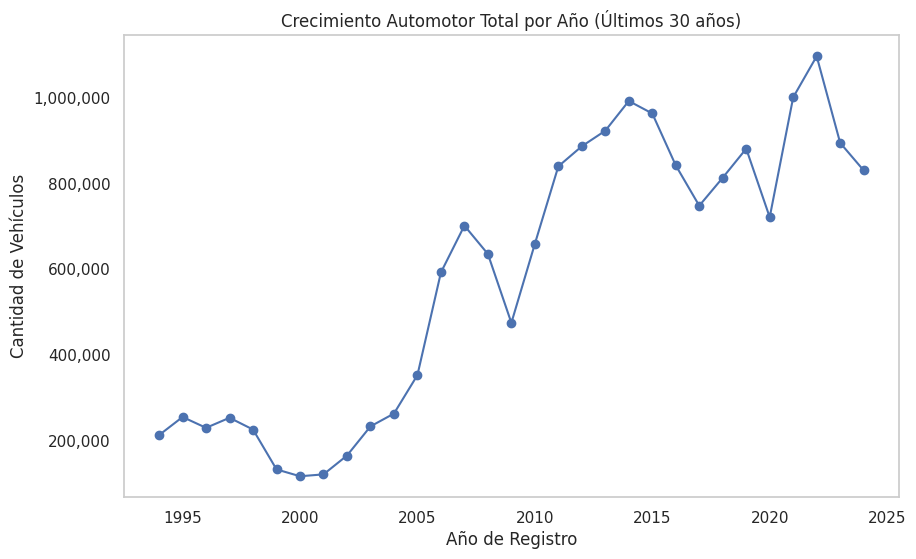

In [ ]:
# Filtre los últimos 30 años desde la fecha actual
year_limit = pd.to_datetime('today').year - 30
df_filtered = df[df['AÑO DE REGISTRO'] >= year_limit]

# Agrupe por 'AÑO DE REGISTRO' y sume las cantidades
df_yearly = df_filtered.groupby('AÑO DE REGISTRO')['CANTIDAD'].sum().reset_index()

# Cree el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_yearly['AÑO DE REGISTRO'], df_yearly['CANTIDAD'], marker='o', color='b', linestyle='-')
plt.title('Crecimiento Automotor Total por Año (Últimos 30 años)')
plt.xlabel('Año de Registro')
plt.ylabel('Cantidad de Vehículos')

# Configure para mostrar números enteros en el eje y
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid()
plt.show()

## Cantidad por categoria.

En este análisis, agrupe los datos por la columna "CATEGORIA" y luego sume los valores de "CANTIDAD" para cada categoría. Esto nos ayuda a ver el total de "CANTIDAD" por cada tipo de categoría de autos.

In [ ]:
df_categoria = df.groupby('CATEGORIA')['CANTIDAD'].sum().reset_index()
print(df_categoria)


                 CATEGORIA  CANTIDAD
0                  AUTOBUS    199338
1              AUTOMOVILES   3936953
2       AUTOS DE ELEVACION       642
3                   CAMION   2373793
4                CAMIONETA    753095
5   EQUIPO DE CONSTRUCCION       272
6      MAQUINARIA AGRICOLA      7069
7    MAQUINARIA INDUSTRIAL     40673
8                     MOTO  12393019
9                    OTROS     48716
10    VEHICULOS ESPECIALES        49


## Distribucion de Vehiculos por categoria

Este gráfico presenta la distribución de vehículos según su categoría, destacando la agrupación de diversas subcategorías bajo la categoría general de "OTROS AUTOMOTORES". A través de este análisis visual, podemos observar la cantidad de vehículos en cada categoría, lo que nos permite identificar las áreas con mayor presencia en el parque automotor. Este enfoque ayuda a simplificar la comprensión de la distribución de los vehículos y resaltar las categorías más representativas.

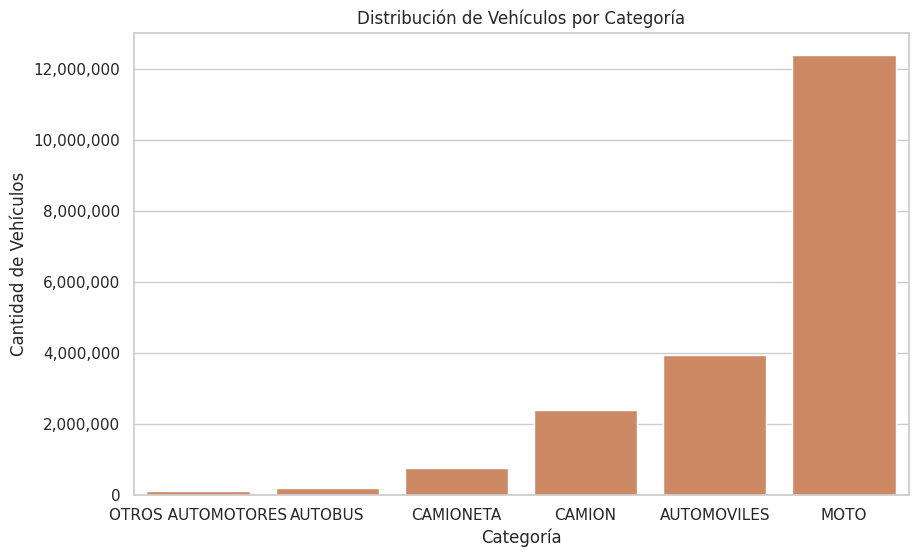

In [ ]:
# Defini las categorías a agrupe en "OTROS AUTOMOTORES"
categorias_otros = [
    "MAQUINARIA INDUSTRIAL", "EQUIPO DE CONSTRUCCION",
    "AUTOS DE ELEVACION", "MAQUINARIA AGRICOLA", "VEHICULOS ESPECIALES", "OTROS"
]

# Reemplace las categorías seleccionadas por "OTROS AUTOMOTORES"
df['CATEGORIA'] = df['CATEGORIA'].replace(categorias_otros, 'OTROS AUTOMOTORES')

# Agrupe por categoría y sume la columna 'CANTIDAD'
categoria_counts = df.groupby('CATEGORIA')['CANTIDAD'].sum().sort_values()

# Configure el estilo de Seaborn para una mejor visualización
sns.set(style="whitegrid")

# Cree el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=categoria_counts.index, y=categoria_counts.values)

# Elimine la advertencia eliminando `palette`  usando otro enfoque de color
sns.barplot(x=categoria_counts.index, y=categoria_counts.values)

# Configure el formateo de los números en el eje Y
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Añadi título y etiquetas
plt.title('Distribución de Vehículos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Vehículos')

# Visualizar el gráfico
plt.show()